In [1]:
import tensorflow as tf
%tensorflow_version 2.x

2023-04-12 11:25:47.104165: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
UsageError: Line magic function `%tensorflow_version` not found.


In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [58]:
number_of_datapoint =100
x = np.random.uniform(low=-5,high=5, size=(number_of_datapoint,1))
y = np.random.uniform(low=-5,high=5,size=(number_of_datapoint,1))

In [59]:
x[:5,:].round(2)

array([[-4.73],
       [-0.6 ],
       [ 0.18],
       [-2.77],
       [ 0.68]])

In [60]:
noise = np.random.uniform(low=-1,high=1,size=(number_of_datapoint,1))
z = 7 * x + 6 * y + 5 + noise

In [61]:
inputs = np.column_stack((x,y))

In [72]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,input_shape =[2])
])

model.compile(loss='mean_squared_error',optimizer='SGD',metrics=['mse'])

In [73]:
history = tf.keras.callbacks.History()

In [74]:
model.fit(inputs,z,epochs=15,verbose=1,callbacks=[history],validation_split=0.2)

Epoch 1/15
3/3 [==============================] - 0s 69ms/step - loss: 568.8240 - mse: 568.8240 - val_loss: 616.6409 - val_mse: 616.6409
Epoch 2/15
3/3 [==============================] - 0s 16ms/step - loss: 264.4729 - mse: 264.4729 - val_loss: 293.9331 - val_mse: 293.9331
Epoch 3/15
3/3 [==============================] - 0s 16ms/step - loss: 126.1681 - mse: 126.1681 - val_loss: 151.8994 - val_mse: 151.8994
Epoch 4/15
3/3 [==============================] - 0s 18ms/step - loss: 66.0596 - mse: 66.0596 - val_loss: 80.0023 - val_mse: 80.0023
Epoch 5/15
3/3 [==============================] - 0s 17ms/step - loss: 37.3136 - mse: 37.3136 - val_loss: 50.2086 - val_mse: 50.2086
Epoch 6/15
3/3 [==============================] - 0s 18ms/step - loss: 25.2111 - mse: 25.2111 - val_loss: 33.8574 - val_mse: 33.8574
Epoch 7/15
3/3 [==============================] - 0s 16ms/step - loss: 18.7688 - mse: 18.7688 - val_loss: 26.3480 - val_mse: 26.3480
Epoch 8/15
3/3 [==============================] - 0s 18ms

In [75]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


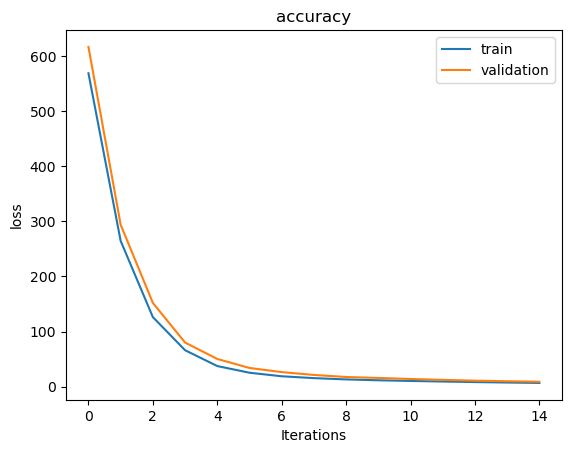

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.title('accuracy')
plt.legend(['train','validation'],loc='upper right')

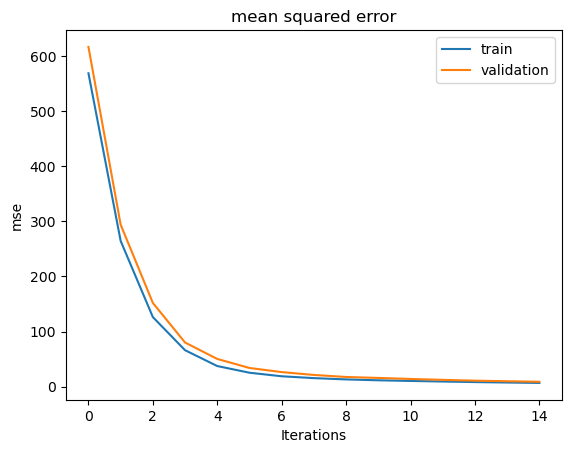

In [77]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.xlabel('Iterations')
plt.ylabel('mse')
plt.title('mean squared error')
plt.legend(['train','validation'],loc='upper right')

4/4 [==============================] - 0s 2ms/step


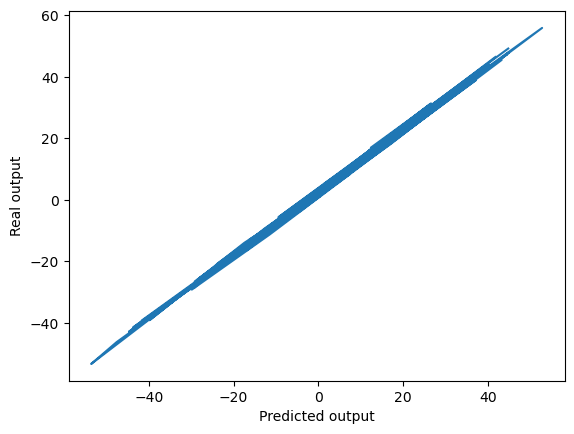

In [78]:
plt.plot(np.squeeze(model.predict(inputs)),np.squeeze(z))
plt.xlabel('Predicted output')
plt.ylabel('Real output')
plt.show()

In [79]:
ne = np.column_stack((2,3))
print(f'Predicted value z for x=2 and y =3 is ==>{model.predict(ne)}')
print(f'Real value z for x=2 and y =3 is ==>{7 * 2 + 6 * 3 + 5}')

1/1 [==============================] - 0s 48ms/step
Predicted value z for x=2 and y =3 is ==>[[33.97211]]
Real value z for x=2 and y =3 is ==>37
